In [14]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from itertools import product


# Ładowanie i transformacja danych

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

transform = transforms.ToTensor()

train_data = torchvision.datasets.FashionMNIST('./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.FashionMNIST('./data', train=False, download=True, transform=transform)

def get_subset(dataset, percentage):
    subset_size = int(len(dataset) * percentage)
    return Subset(dataset, list(range(subset_size)))


# Definicja modelu

In [9]:
class SingleLayerNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        return self.fc(x)

class TwoLayerNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        return self.fc2(x)


# Funkcja trenująca

In [10]:
def train_model(model, train_loader, test_loader, num_epochs, criterion, optimizer, device):
    model.to(device)
    train_losses, test_losses, accuracies = [], [], []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        train_losses.append(epoch_loss / len(train_loader))

        model.eval()
        test_loss, correct = 0, 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                test_loss += criterion(outputs, targets).item()
                _, predicted = outputs.max(1)
                correct += (predicted == targets).sum().item()

        test_losses.append(test_loss / len(test_loader))
        accuracies.append(100 * correct / len(test_loader.dataset))
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracies[-1]:.2f}%")

    return train_losses, test_losses, accuracies


# Eksperymenty

Running: 
	batch size: 16
	hidden size: 64
	percentage: 0.01
Running: 
	batch size: 16
	hidden size: 64
	percentage: 0.1
Running: 
	batch size: 16
	hidden size: 64
	percentage: 1.0
Running: 
	batch size: 16
	hidden size: 128
	percentage: 0.01
Running: 
	batch size: 16
	hidden size: 128
	percentage: 0.1
Running: 
	batch size: 16
	hidden size: 128
	percentage: 1.0
Running: 
	batch size: 16
	hidden size: 256
	percentage: 0.01
Running: 
	batch size: 16
	hidden size: 256
	percentage: 0.1
Running: 
	batch size: 16
	hidden size: 256
	percentage: 1.0
Running: 
	batch size: 32
	hidden size: 64
	percentage: 0.01
Running: 
	batch size: 32
	hidden size: 64
	percentage: 0.1
Running: 
	batch size: 32
	hidden size: 64
	percentage: 1.0
Running: 
	batch size: 32
	hidden size: 128
	percentage: 0.01
Running: 
	batch size: 32
	hidden size: 128
	percentage: 0.1
Running: 
	batch size: 32
	hidden size: 128
	percentage: 1.0
Running: 
	batch size: 32
	hidden size: 256
	percentage: 0.01
Running: 
	batch size: 3

KeyboardInterrupt: 

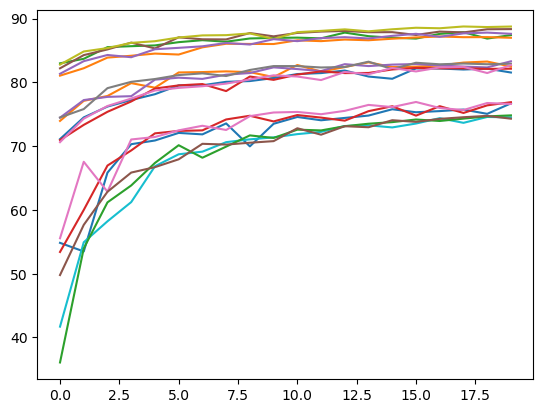

In [18]:
input_size = 28 * 28
num_classes = 10
hidden_sizes = [64, 128, 256]
batch_sizes = [16, 32, 64]
percentages = [0.01, 0.1, 1.0]
num_epochs = 20

for batch_size, hidden_size, percentage in product(batch_sizes, hidden_sizes, percentages):
    print(f"Running: \n\tbatch size: {batch_size}\n\thidden size: {hidden_size}\n\tpercentage: {percentage}")
    subset = get_subset(train_data, percentage)
    train_loader = DataLoader(subset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    model = TwoLayerNN(input_size, hidden_size, num_classes)
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    train_losses, test_losses, accuracies = train_model(model, train_loader, test_loader, num_epochs=num_epochs, criterion=criterion, optimizer=optimizer)

    plt.plot(accuracies, label=f'Hidden size: {hidden_size}, batch size: {batch_size}, percentage: {percentage}')

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()
